# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key
# from config import gkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# print(cities)

cities_df['Country'] = ''
cities_df['Longitude'] = ''
cities_df['Latitude'] = ''
cities_df['Date'] = ''
cities_df['Cloudiness'] = ''
cities_df['Temperature Max'] = ''
cities_df['Humidity'] = ''
cities_df['Wind speed'] = ''

rows = 1

# loop through cities, make API request, and append desired results
print("Data Retrieval")
print("-------------------------")

# Create a dictionary with parameters to access API
access = {"appid": api_key, "units": "imperial"}

# Base url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query url
query_url = f"{url}appid={api_key}&units={units}&q="


for index, row in cities_df.iterrows():
   city = row["Cities"]
   #response = requests.get(url + city).json()
   response = requests.get(query_url + city).json()

   try:
       cities_df.set_value(index, "Country", response["sys"]["country"])
       cities_df.set_value(index,"Longitude", response["coord"]["lon"])
       cities_df.set_value(index, "Latitude", response["coord"]["lat"])
       cities_df.set_value(index, "Date", response['dt'])
       cities_df.set_value(index, "Cloudiness", response["clouds"]["all"])
       cities_df.set_value(index, "Temperature Max", response["main"]["temp_max"])
       cities_df.set_value(index, "Humidity", response["main"]["humidity"])
       cities_df.set_value(index, "Wind speed", response["wind"]["speed"])

       print(f"Processing Record {rows} | {city}")

       rows += 1

    except:
       print(f"City not found. Skipping...")

Data Retrieval
-------------------------


C:\Users\hmack\Anaconda3\lib\site-packages\ipykernel_launcher.py:84: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\hmack\Anaconda3\lib\site-packages\ipykernel_launcher.py:85: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\hmack\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\hmack\Anaconda3\lib\site-packages\ipykernel_launcher.py:87: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\hmack\Anaconda3\lib\site-packages\ipykernel_launcher.py:88: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\hmack\Anaconda3\lib\s

Processing Record 1 | smidovich
Processing Record 2 | chokurdakh
Processing Record 3 | qaanaaq
Processing Record 4 | tuatapere
Processing Record 5 | hit
Processing Record 6 | mount isa
Processing Record 7 | zhigansk
Processing Record 8 | albany
City not found. Skipping...
City not found. Skipping...
Processing Record 9 | waingapu
Processing Record 10 | cap malheureux
Processing Record 11 | sistranda
City not found. Skipping...
Processing Record 12 | ushuaia
Processing Record 13 | cidreira
Processing Record 14 | muli
Processing Record 15 | hadejia
Processing Record 16 | cape town
Processing Record 17 | rikitea
Processing Record 18 | kainantu
Processing Record 19 | beringovskiy
Processing Record 20 | jamestown
City not found. Skipping...
Processing Record 21 | chuy
Processing Record 22 | sao joao da barra
Processing Record 23 | kavieng
Processing Record 24 | atuona
Processing Record 25 | bredasdorp
Processing Record 26 | ribeira grande
Processing Record 27 | satinka
Processing Record 28 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cities_df.head()
cities_df = cities_df.drop(cities_df[cities_df["Country"]== ""].index)
cities_df

,Cities,Country,Longitude,Latitude,Date,Cloudiness,Temperature Max,Humidity,Wind speed
0,smidovich,RU,133.81,48.6,1555859242,0,39.84,35,6.13
1,chokurdakh,RU,147.9,70.62,1555859243,61,12.48,85,16.28
2,qaanaaq,GL,-69.36,77.48,1555859244,100,3.3,88,3.24
3,tuatapere,NZ,167.69,-46.13,1555858808,0,44.01,95,12.64
4,hit,IQ,42.83,33.64,1555859247,100,70.62,23,19.08
5,mount isa,AU,139.49,-20.73,1555857000,90,78.8,36,9.17
6,zhigansk,RU,123.37,66.77,1555859249,100,17.16,82,7.56
7,albany,US,-73.75,42.65,1555858961,75,68,63,8.05
10,waingapu,ID,120.26,-9.65,1555859252,100,76.02,88,9.71
11,cap malheureux,MU,57.61,-19.98,1555858443,40,82.4,74,13.87


In [6]:
cities_df.to_csv(r'../CitiesInformation.csv')

In [23]:
file = "../CitiesInformation.csv"

cities_info_df = pd.read_csv(file)
cities_info_df = cities_info_df.rename(columns={"Unnamed: 0":"Index"})
cities_info_df.set_index("Index")

,Cities,Country,Longitude,Latitude,Date,Cloudiness,Temperature Max,Humidity,Wind speed
Index,,,,,,,,,
0,smidovich,RU,133.81,48.60,1555859242,0,39.84,35,6.13
1,chokurdakh,RU,147.90,70.62,1555859243,61,12.48,85,16.28
2,qaanaaq,GL,-69.36,77.48,1555859244,100,3.30,88,3.24
3,tuatapere,NZ,167.69,-46.13,1555858808,0,44.01,95,12.64
4,hit,IQ,42.83,33.64,1555859247,100,70.62,23,19.08
5,mount isa,AU,139.49,-20.73,1555857000,90,78.80,36,9.17
6,zhigansk,RU,123.37,66.77,1555859249,100,17.16,82,7.56
7,albany,US,-73.75,42.65,1555858961,75,68.00,63,8.05
10,waingapu,ID,120.26,-9.65,1555859252,100,76.02,88,9.71


In [22]:
cities_humidity_df = pd.DataFrame({"Humidity %":cities_info_df["Humidity"]/100})
# cities_humidity_df

In [21]:
cities_cloudiness_df = pd.DataFrame({"Cloudiness %":cities_info_df["Cloudiness"]/100})
# cities_cloudiness_df

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

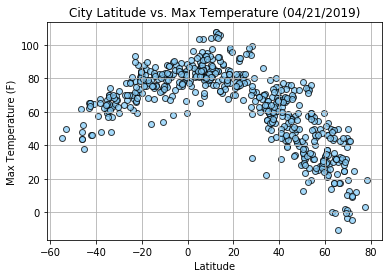

In [15]:
plt.scatter(cities_info_df["Latitude"],cities_info_df["Temperature Max"],marker="o",facecolors='lightskyblue',edgecolors='black',alpha=0.75)
plt.title("City Latitude vs. Max Temperature (04/21/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

#### Latitude vs. Humidity Plot

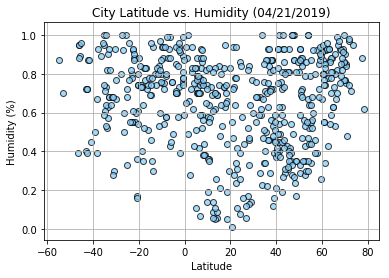

In [18]:
plt.scatter(cities_df["Latitude"],cities_humidity_df["Humidity %"],marker="o",facecolors='lightskyblue',edgecolors='black',alpha=0.75)
plt.title("City Latitude vs. Humidity (04/21/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#### Latitude vs. Cloudiness Plot

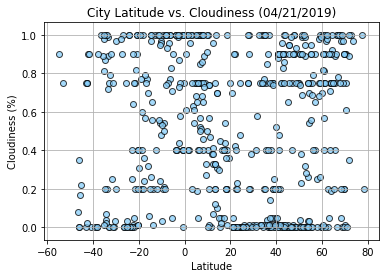

In [19]:
plt.scatter(cities_df["Latitude"],cities_cloudiness_df["Cloudiness %"],marker="o",facecolors='lightskyblue',edgecolors='black',alpha=0.75)
plt.title("City Latitude vs. Cloudiness (04/21/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#### Latitude vs. Wind Speed Plot

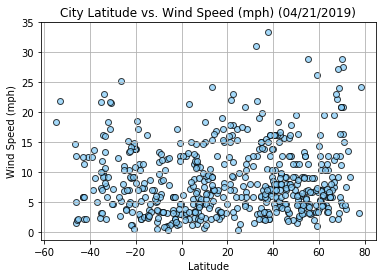

In [20]:
plt.scatter(cities_info_df["Latitude"],cities_info_df["Wind speed"],marker="o",facecolors='lightskyblue',edgecolors='black',alpha=0.75)
plt.title("City Latitude vs. Wind Speed (mph) (04/21/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

In [ ]:
# 3 Observable Trends in the Data
# 1. The latitude does have an effect on the max temperature of each location that once latutitude reaches above 20, you see the max temperature decrease steadily as the latitude increases above 20.
# 2. There is a higher frequency of higher humidity % than lower humidity %.
# 3. There is a higher frequency of lower wind speeds than higher wind speeds across all latutitudes observed.